In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
df["flower"] = iris.target

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df0 = df[df.flower == 0]
df1 = df[df.flower == 1]
df2 = df[df.flower == 2]

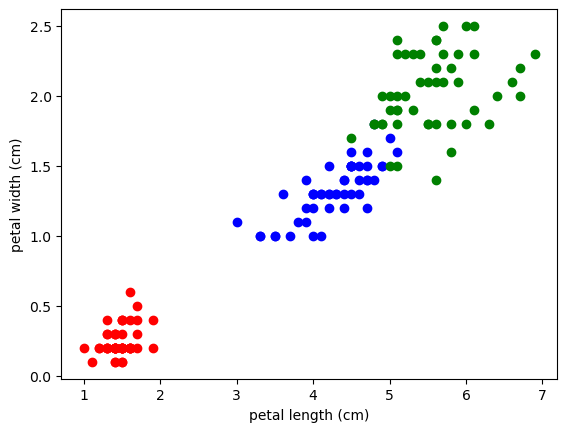

In [7]:
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color="red")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color="blue")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], color="green")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

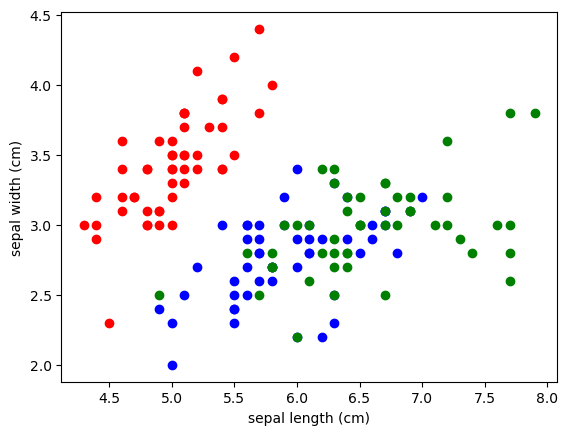

In [8]:
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="red")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color="blue")
plt.scatter(df2["sepal length (cm)"], df2["sepal width (cm)"], color="green")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

In [9]:
X = iris.data
Y = iris.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [13]:
model = RandomForestClassifier()

In [14]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [15]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [17]:
cm = confusion_matrix(y_test, y_pred)

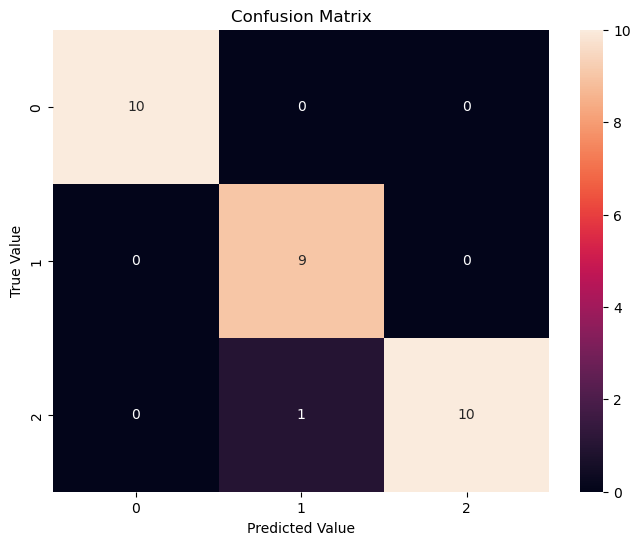

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Confusion Matrix")
plt.show()

In [19]:
dump(model, "model.joblib")

['model.joblib']